In [23]:
import numpy as np
from qutip import *
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

1.

In [24]:
slope = 1
offset = 0.25
time = np.linspace(0,10,10)
data = np.random.normal(slope*time + offset,1)
sigma = 1*np.random.normal(np.ones(len(data)),0.01)

<ErrorbarContainer object of 3 artists>

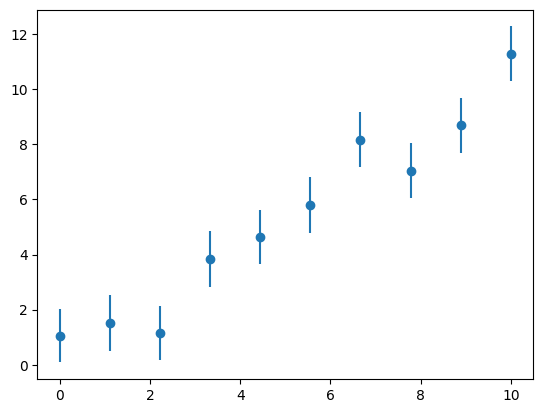

In [25]:
plt.errorbar(time,data,sigma,fmt="o")

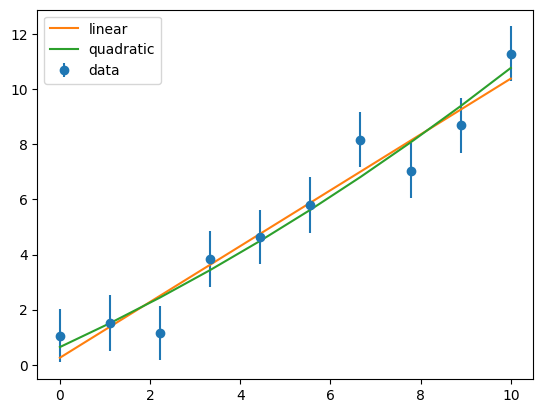

In [26]:
def linear(t,a,b):
  return a*t+b

def quadratic(t,a,b,c):
  return a*t**2+b*t+c

l_p,l_cov=curve_fit(linear,time,data,p0=[0.9,1])
q_p,q_cov=curve_fit(quadratic,time,data,p0=[0.9,0.5,0.5])

l_fit=linear(time,l_p[0],l_p[1])
q_fit=quadratic(time,q_p[0],q_p[1],q_p[2])

plt.errorbar(time,data,sigma,fmt="o",label="data")
plt.plot(time,l_fit,label="linear")
plt.plot(time,q_fit,label="quadratic")
plt.legend()

In [27]:
print(l_p)
print(q_p)

[1.01361242 0.25333304]
[0.02616809 0.75193156 0.64100839]


In [28]:
def k(real,fit):
  return np.sum((real-fit)**2/fit)

In [29]:
k_l=k(data,l_fit)
k_q=k(data,q_fit)

In [30]:
print("x^2 for linear model:",k_l)
print("x^2 for quadratic model",k_q)

x^2 for linear model: 3.7820914230434988
x^2 for quadratic model 1.4906244015176324


In [31]:
N=10
v_l=N-2
v_q=N-3
print("x^2/v for linear model:",k_l/v_l)
print("x^2/v for quadratic model",k_q/v_q)

x^2/v for linear model: 0.47276142788043735
x^2/v for quadratic model 0.2129463430739475


3.

In [32]:
def probability(omega,delta,t_w,t_p):
  omega_p=np.sqrt(omega**2+delta**2)
  return 1-omega**2/omega_p**4*(omega_p*np.cos(delta*t_w/2)*np.sin(omega_p*t_p)-2*delta*np.sin(delta*t_w/2)*(np.sin(omega_p*t_p/2))**2)**2

def data_generator(p,N):
  data=[]
  for i in range(N):
    if np.random.rand()<p:
      data.append(1)
    else:
      data.append(0)
  return data


In [33]:
omega=2*np.pi
delta=np.pi/4
t_p=np.pi/2/omega
N_list=[1,10,100,1000]
time=np.linspace(0,10,100)

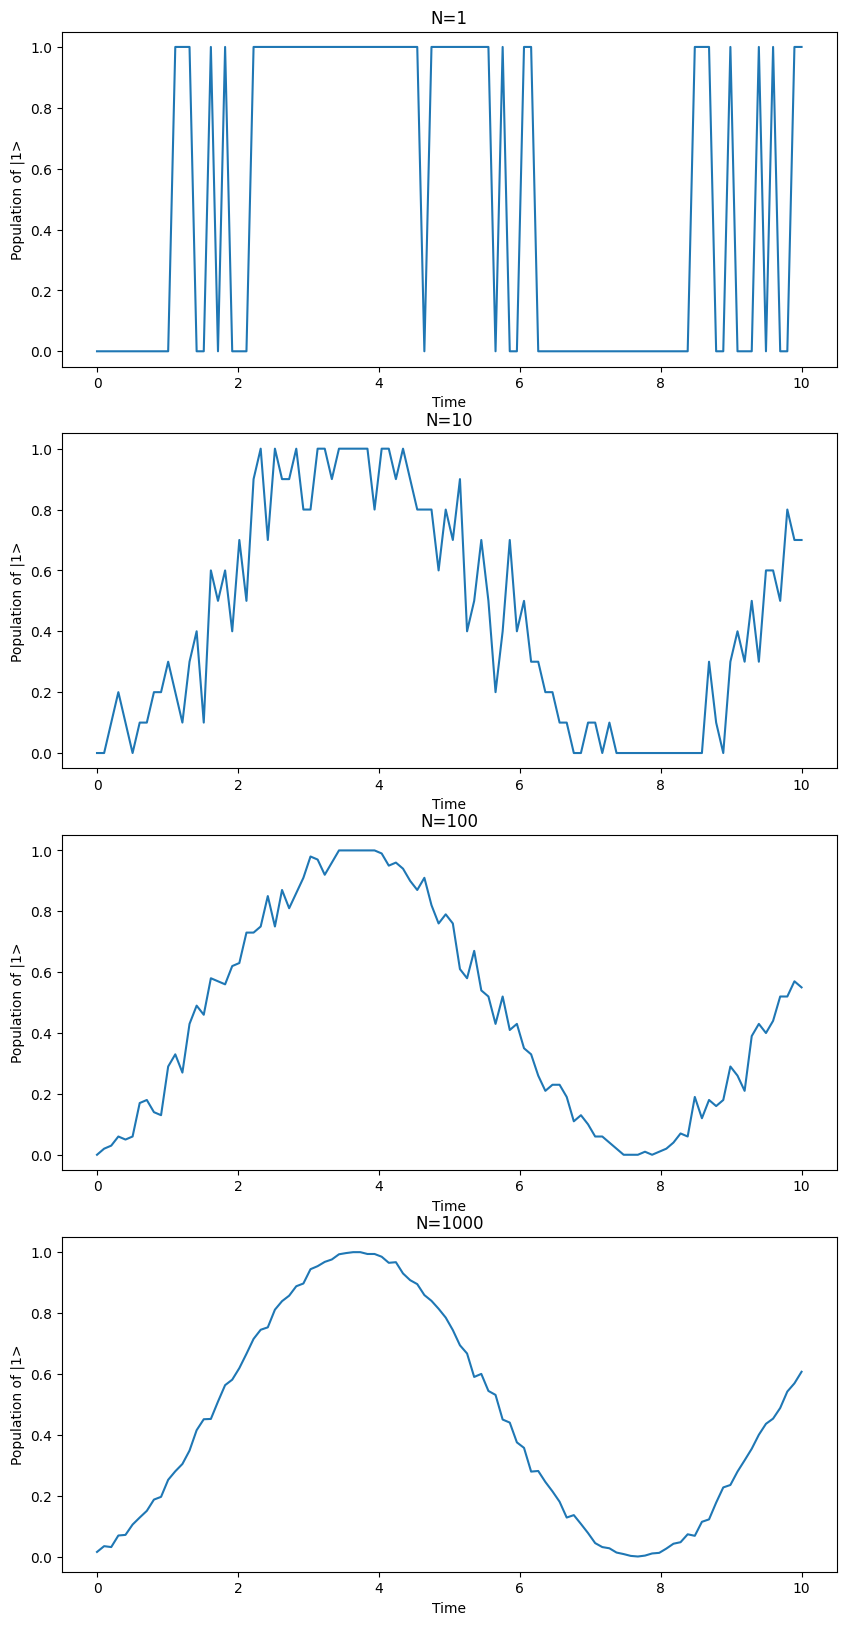

In [34]:
p_list=probability(omega,delta,time,t_p)
fig, axs = plt.subplots(4, 1, figsize=(10, 20))
for i in range(len(N_list)):
  data=[data_generator(p,N_list[i]) for p in p_list]
  data=np.array(data).sum(axis=1)/N_list[i]
#  time_n=np.repeat(time,N_list[i])
  plt.subplot(len(N_list),1,i+1)
  axs[i].plot(time,data)
  axs[i].set_title("N="+str(N_list[i]))
  axs[i].set_xlabel("Time")
  axs[i].set_ylabel("Population of |1>")

4.

a.

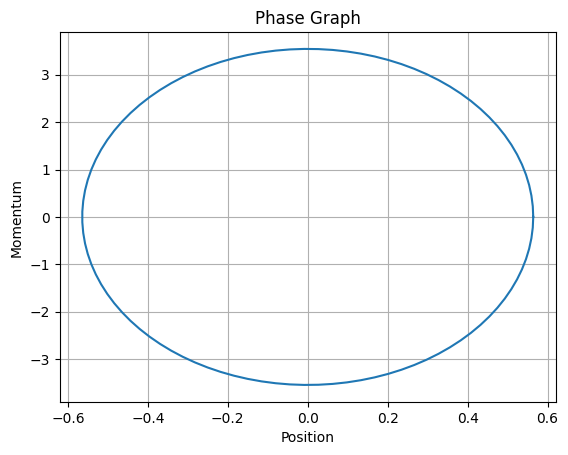

In [35]:
def evolution(omega,t,N):
  return (-1j*t*omega*(create(N)*destroy(N)+1/2)).expm()

N=100
m=1
omega=2*np.pi
initial_state=displace(N,1)*basis(N,0)
t_list=np.linspace(0,1,100)
x_expectation=[]
p_expectation=[]
x_op=np.sqrt(1/(2*m*omega))*(create(N)+destroy(N))
p_op=-1j*np.sqrt((m*omega)/2)*(destroy(N)-create(N))
for t in t_list:
  state=evolution(omega,t,N)*initial_state
  x_expectation.append(expect(x_op,state))
  p_expectation.append(expect(p_op,state))
plt.plot(x_expectation,p_expectation)
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Phase Graph')
plt.grid(True)
plt.show()

b.

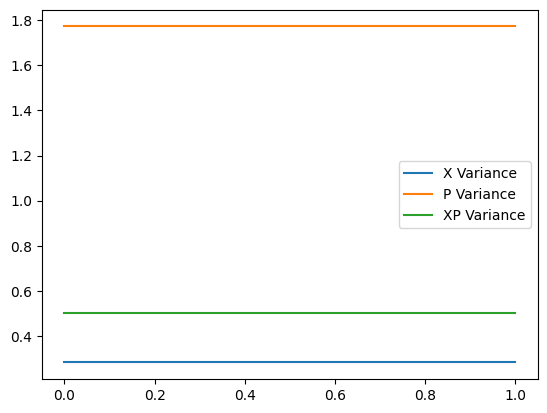

In [36]:
x_variance=[]
p_variance=[]
for t in t_list:
  state=evolution(omega,t,N)*initial_state
  x_variance.append(expect(x_op**2,state))
  p_variance.append(expect(p_op**2,state))

x_expectation=np.array(x_expectation)
p_expectation=np.array(p_expectation)
x_variance=np.sqrt(x_variance-x_expectation**2)
p_variance=np.sqrt(p_variance-p_expectation**2)
plt.plot(t_list,x_variance,label="X Variance")
plt.plot(t_list,p_variance,label="P Variance")
plt.plot(t_list,x_variance*p_variance,label="XP Variance")
plt.legend()

c.

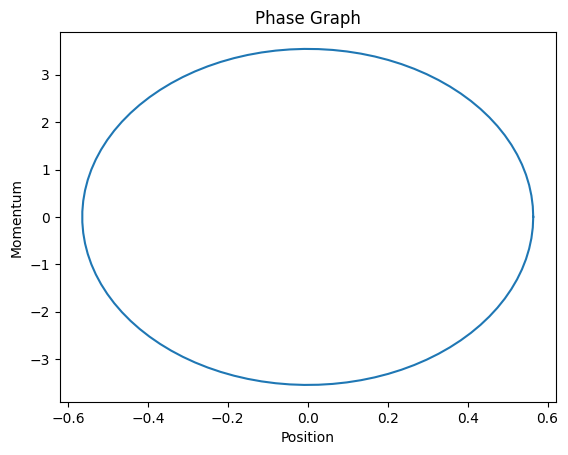

In [37]:
initial_state=displace(N,1)*squeeze(N,1)*basis(N,0)
x_expectation=[]
p_expectation=[]
for t in t_list:
  state=evolution(omega,t,N)*initial_state
  x_expectation.append(expect(x_op,state))
  p_expectation.append(expect(p_op,state))
plt.plot(x_expectation,p_expectation)
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Phase Graph')
plt.show()

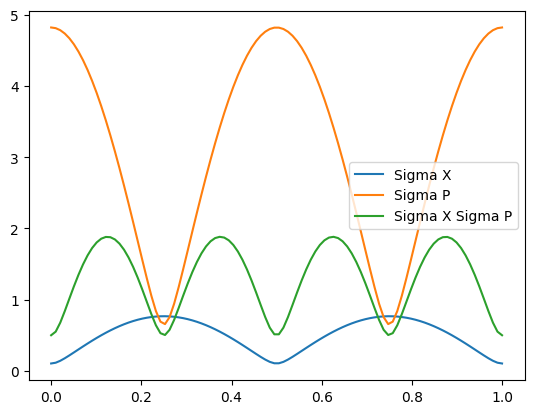

In [38]:
x_std=[]
p_std=[]
for t in t_list:
  state=evolution(omega,t,N)*initial_state
  x_std.append(expect(x_op**2,state))
  p_std.append(expect(p_op**2,state))

x_expectation=np.array(x_expectation)
p_expectation=np.array(p_expectation)
x_std=np.sqrt(x_std-x_expectation**2)
p_std=np.sqrt(p_std-p_expectation**2)
plt.plot(t_list,x_std,label="Sigma X")
plt.plot(t_list,p_std,label="Sigma P")
plt.plot(t_list,x_std*p_std,label="Sigma X Sigma P")
plt.legend()

d.

In [39]:
H0=omega*(create(N)*destroy(N)+1/2)
initial_state=basis(N,0)
def H1_c(t,args):
  return np.sin(2*omega*t)
def H2_c(t,args):
  return np.sin(2*omega*t)

result=sesolve([H0,[x_op,H1_c],[x_op**2,H2_c]],initial_state,t_list,e_ops=[x_op,p_op,x_op**2,p_op**2])

x_expectation,p_expectation,x_std,p_std=result.expect
x_std=x_std-x_expectation**2
p_std=p_std-p_expectation**2


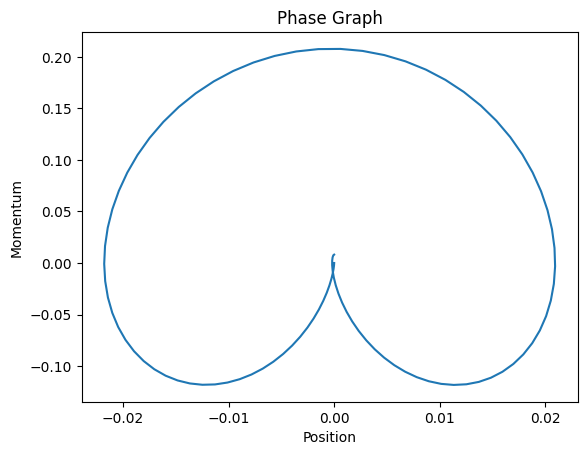

In [40]:
plt.plot(x_expectation,p_expectation)
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Phase Graph')
plt.show()

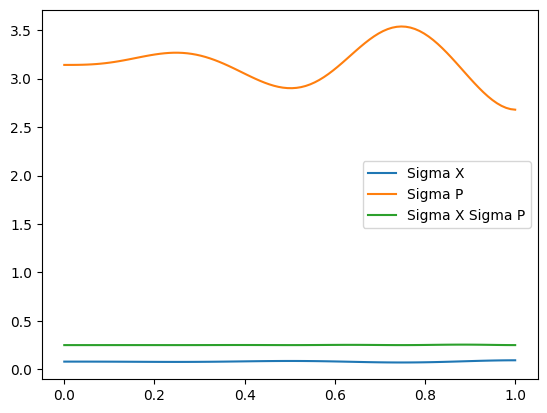

In [41]:
plt.plot(t_list,x_std,label="Sigma X")
plt.plot(t_list,p_std,label="Sigma P")
plt.plot(t_list,x_std*p_std,label="Sigma X Sigma P")
plt.legend()

e.

In [42]:
result=sesolve([H0,[x_op**2,H2_c]],initial_state,t_list,e_ops=[x_op,p_op,x_op**2,p_op**2])

x_expectation,p_expectation,x_std,p_std=result.expect
x_std=x_std-x_expectation**2
p_std=p_std-p_expectation**2


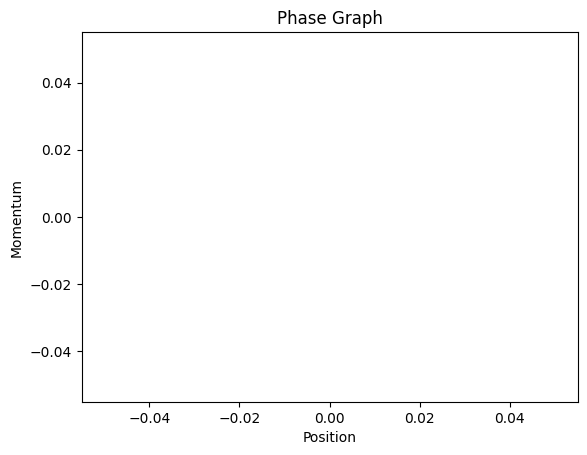

In [43]:
plt.plot(x_expectation,p_expectation)
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Phase Graph')
plt.show()

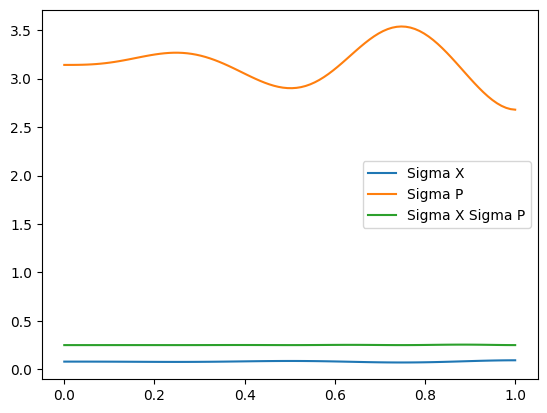

In [44]:
plt.plot(t_list,x_std,label="Sigma X")
plt.plot(t_list,p_std,label="Sigma P")
plt.plot(t_list,x_std*p_std,label="Sigma X Sigma P")
plt.legend()